In [ ]:
# Import required libraries
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Download dataset
path = kagglehub.dataset_download("yasserh/titanic-dataset")
print("Dataset Path:", path)
print("Files:", os.listdir(path))

# Load dataset
df = pd.read_csv(f"{path}/Titanic-Dataset.csv")

# Display first few rows
df.head()


Using Colab cache for faster access to the 'titanic-dataset' dataset.
Dataset Path: /kaggle/input/titanic-dataset
Files: ['Titanic-Dataset.csv']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Summary statistics for numerical features
print("Summary statistics for numerical features:")
print(df.describe())

# Summary for categorical features
print("\nSummary for categorical features:")
print(df.describe(include=['O']))

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Summary statistics for numerical features:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Summary for categorical features:
   

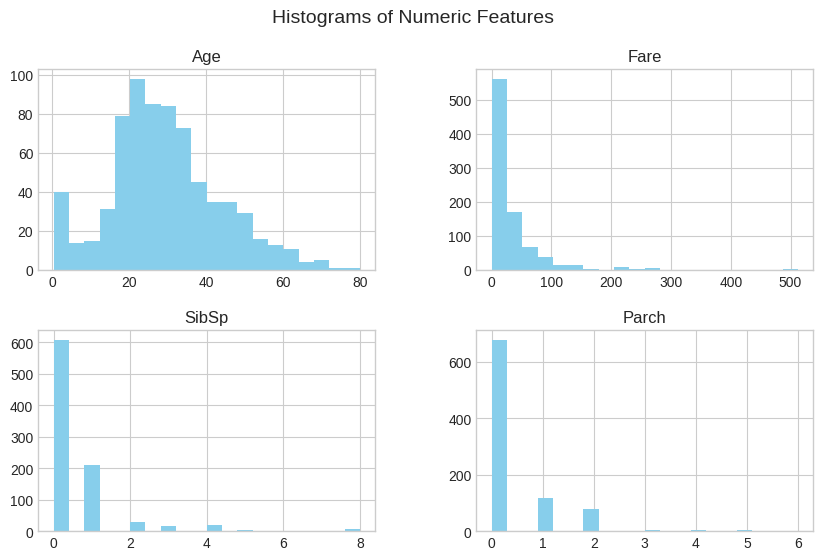

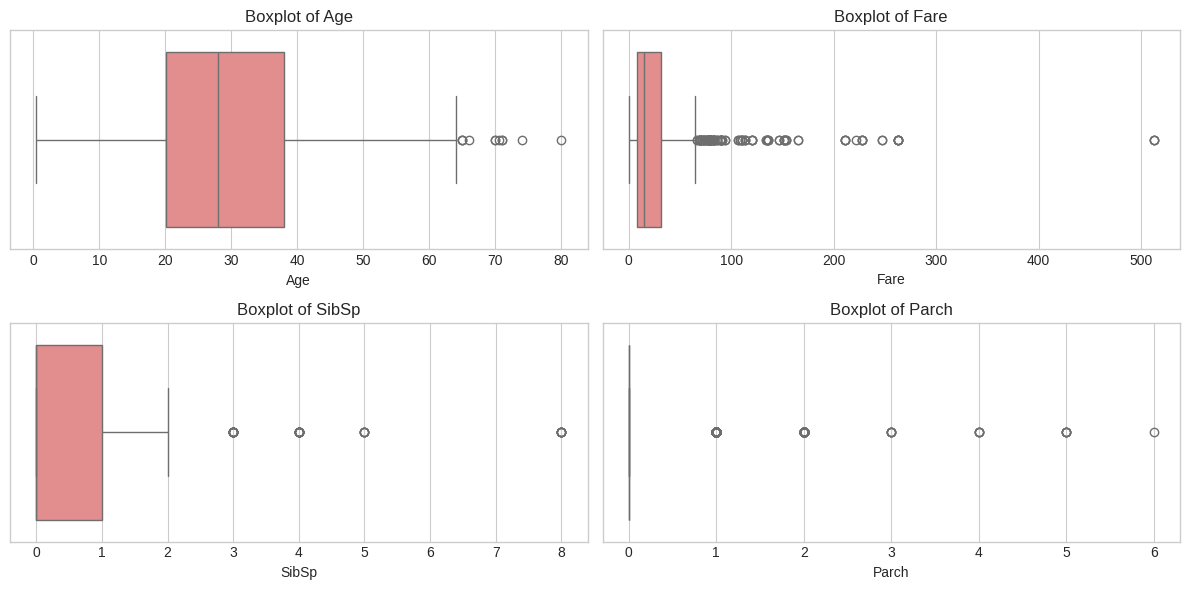

In [ ]:
# Set up matplotlib style
plt.style.use('seaborn-v0_8-whitegrid')

# List of numeric columns
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Histograms
df[numeric_cols].hist(figsize=(10, 6), bins=20, color='skyblue')
plt.suptitle("Histograms of Numeric Features", fontsize=14)
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


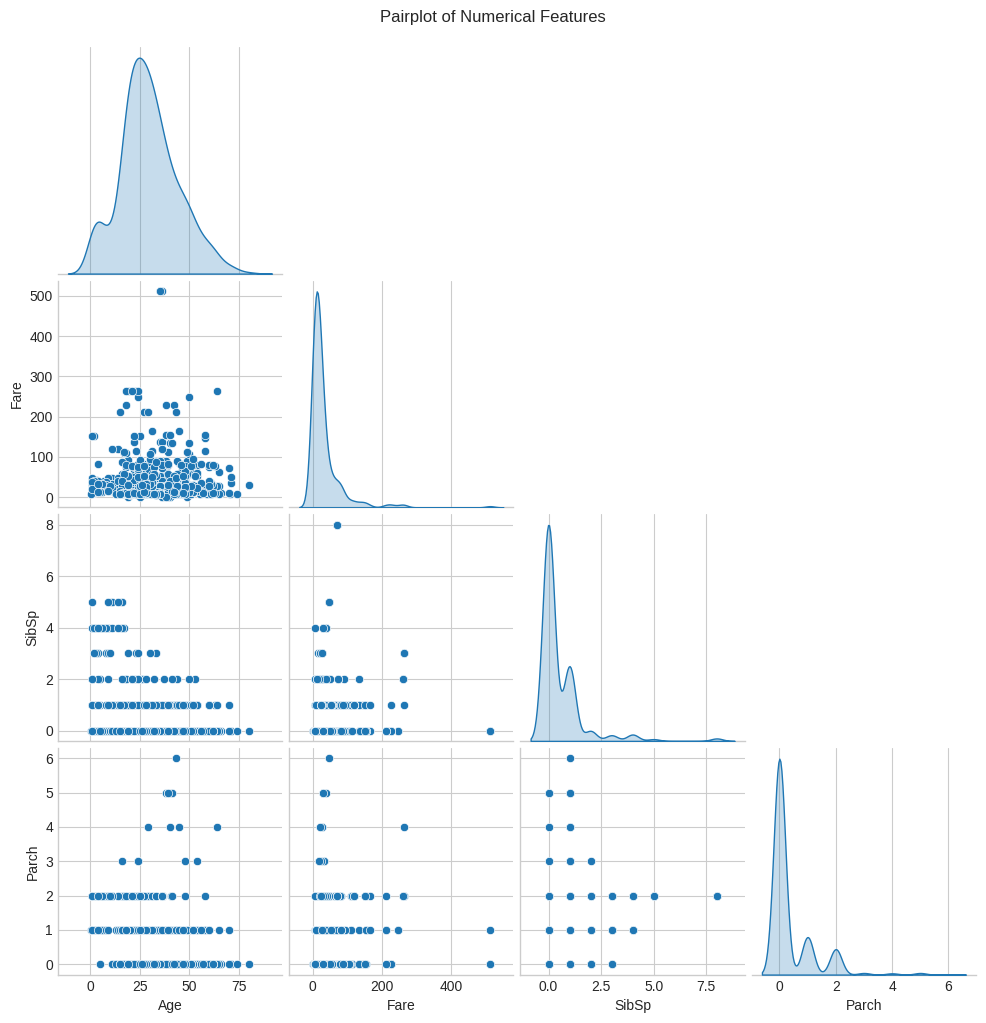

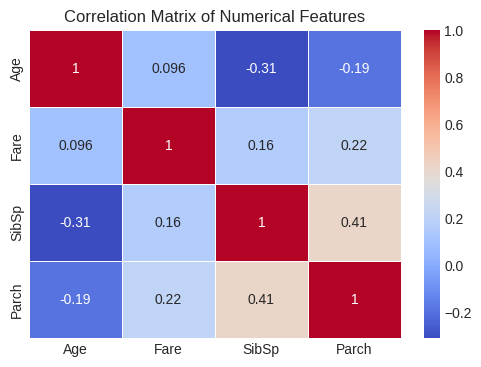

In [ ]:
# Pairplot for relationships
sns.pairplot(df[['Age', 'Fare', 'SibSp', 'Parch']], diag_kind='kde', corner=True)
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

# Correlation matrix
corr = df[['Age', 'Fare', 'SibSp', 'Parch']].corr()

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


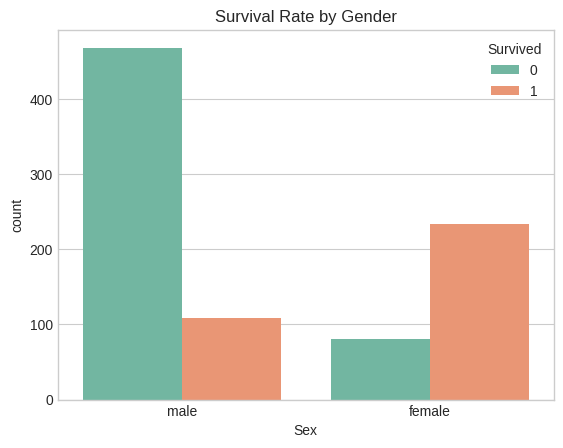

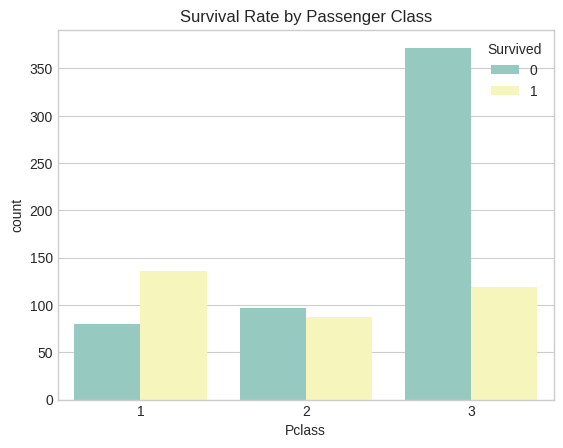

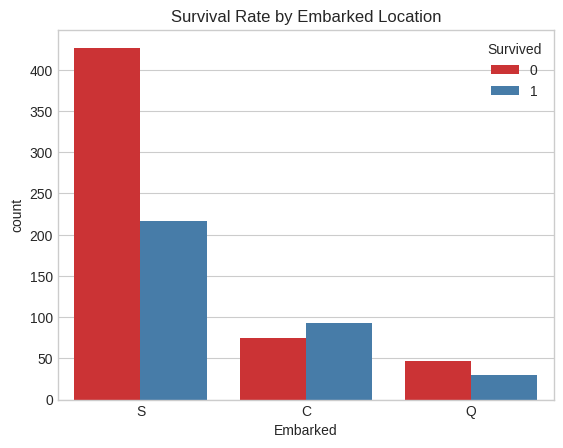

In [ ]:
# Survival rate by gender
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set2')
plt.title("Survival Rate by Gender")
plt.show()

# Survival rate by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set3')
plt.title("Survival Rate by Passenger Class")
plt.show()

# Survival rate by Embarkation Point
sns.countplot(x='Embarked', hue='Survived', data=df, palette='Set1')
plt.title("Survival Rate by Embarked Location")
plt.show()


In [ ]:
# Save correlation heatmap to file
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Titanic")
plt.savefig("titanic_correlation_heatmap.png")
plt.close()
